In [18]:
# Importando as livrarias necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import data_processing

A base de dados da Rais São bem grandes, algo aproximadamente de 10GB. Para acelerar o processo, selecionamos
apenas as variáveis de interesse para esta análise. 

In [ ]:
# Selecionar apenas as desejadas:
cols = [
    "Faixa Remun Média (SM)", "Escolaridade após 2005", "Município",
    "Raça Cor", "Sexo Trabalhador", "Faixa Etária",
]

host = "ftp.mtps.gov.br"
cwd = "pdet/microdados/RAIS/2024/"

df = data_processing.ftp_ingestion(host, cwd, cols=cols)



Iniciando aplicação...

FTP server extracter

Esta é a lista de arquivos no diretório indicado: 

Index: 0, Arquivo: RAIS_ESTAB_PUB.7z
Index: 1, Arquivo: RAIS_VINC_PUB_CENTRO_OESTE.7z
Index: 2, Arquivo: RAIS_VINC_PUB_MG_ES_RJ.7z
Index: 3, Arquivo: RAIS_VINC_PUB_NI.7z
Index: 4, Arquivo: RAIS_VINC_PUB_NORDESTE.7z
Index: 5, Arquivo: RAIS_VINC_PUB_NORTE.7z
Index: 6, Arquivo: RAIS_VINC_PUB_SP.7z
Index: 7, Arquivo: RAIS_VINC_PUB_SUL.7z
Extraindo arquivo selecionado do servidor...



In [4]:
# Checando as primeiras linhas do nosso dataset.
df.head(10) 

,Faixa Etária,Faixa Remun Média (SM),Escolaridade após 2005,Município,Raça Cor,Sexo Trabalhador
0,8,98,1,353870,2,1
1,6,98,1,355030,2,1
2,7,98,1,353440,2,1
3,4,1,1,354805,8,1
4,3,98,1,354805,4,1
5,3,98,1,354850,8,1
6,3,98,1,355030,2,1
7,4,98,1,352610,9,1
8,8,98,1,355030,2,1
9,6,1,1,355540,2,1


Utilizamos o módulo com funções e variáveis criado especificamente para este
projeto. Ele contém funções que normalizam os nomes das colunas, e variáveis
que contém a tradução das observações de cada variável selecionada acima.

In [5]:
# Padronizando os labels das variáveis:
df.columns = [data_processing.clean_names(col) for col in df.columns]

df.head() # Verificando se funcionou.

,faixa_etaria,faixa_remun_media_sm_,escolaridade_apos_2005,municipio,raca_cor,sexo_trabalhador
0,8,98,1,353870,2,1
1,6,98,1,355030,2,1
2,7,98,1,353440,2,1
3,4,1,1,354805,8,1
4,3,98,1,354805,4,1


In [6]:
# Filtrando apenas o munípio de interesse:
df_sp = df.query("municipio == 355030")

df_sp.head()

,faixa_etaria,faixa_remun_media_sm_,escolaridade_apos_2005,municipio,raca_cor,sexo_trabalhador
1,6,98,1,355030,2,1
6,3,98,1,355030,2,1
8,8,98,1,355030,2,1
22,7,98,1,355030,8,1
23,3,98,1,355030,8,1


Nos metadados oficiais é informado que observações como `98`, `99`, `-1` podem ser ignoradas caso encontradas, por tanto, optei por excluir essas informações.

In [7]:
# Descartando as observações 98, 99, -1 e a 9 especificamente de raca_cor:
df_sp = df_sp[~(df_sp.isin([98, 99, -1]).any(axis=1))]
df_sp = df_sp[df_sp["raca_cor"] != 9]

In [8]:
# Verificando as dimensões do nosso novo dataset:
df_sp.shape

(6669537, 6)

Nosso novo dataset, após os filtros de município, exclusão de observações indesejadas e variáveis de interesse selecionadas, possui 
6 variáveis e 6.669.537 observações. O próximo passo é traduzir estas observações, pois como é possível ver,
todas estão codificadas. No módulo `data_processing` estão contidas variáveis com
as traduções.

In [9]:
# Traduzindo as observações:
translated_df_sp = df_sp.assign(
    faixa_etaria_traduzido = df_sp["faixa_etaria"].map(data_processing.faixa_etaria_translation),

    faixa_remun_media_sm_traduzido = df_sp["faixa_remun_media_sm_"].map(data_processing.faixa_remun_translation),

    escolaridade_apos_2005_traduzido = df_sp["escolaridade_apos_2005"].map(data_processing.escolaridade_translation),

    raca_cor_traduzido = df_sp["raca_cor"].map(data_processing.raca_cor_translation),

    sexo_trabalhador_traduzido = df_sp["sexo_trabalhador"].map(data_processing.sexo_translation),
)

# Verificando:
translated_df_sp.head()

,faixa_etaria,faixa_remun_media_sm_,escolaridade_apos_2005,municipio,raca_cor,sexo_trabalhador,faixa_etaria_traduzido,faixa_remun_media_sm_traduzido,escolaridade_apos_2005_traduzido,raca_cor_traduzido,sexo_trabalhador_traduzido
80,5,3,1,355030,2,1,30 a 39 anos,"1,51 a 2,00 salários mínimos",analfabeto,branca,masculino
85,3,1,1,355030,2,1,18 a 24 anos,"0,51 a 1,00 salários mínimos",analfabeto,branca,masculino
86,3,1,1,355030,8,1,18 a 24 anos,"0,51 a 1,00 salários mínimos",analfabeto,parda,masculino
93,5,4,1,355030,1,1,30 a 39 anos,"2,01 a 3,00 salários mínimos",analfabeto,indigena,masculino
107,3,0,1,355030,2,1,18 a 24 anos,"Até 0,50 salários mínimos",analfabeto,branca,masculino


Foram inseridas 5 novas variáveis com valores traduzidos no dataset, decidi por
manter as colunas codificadas caso seja necessário no futuro de alguma forma.

In [10]:
# Verificando a base de dados pós tradução das observações:
translated_df_sp.info(memory_usage="deep", show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6669537 entries, 80 to 22467128
Data columns (total 11 columns):
 #   Column                            Non-Null Count    Dtype 
---  ------                            --------------    ----- 
 0   faixa_etaria                      6669537 non-null  int64 
 1   faixa_remun_media_sm_             6669537 non-null  int64 
 2   escolaridade_apos_2005            6669537 non-null  int64 
 3   municipio                         6669537 non-null  int64 
 4   raca_cor                          6669537 non-null  int64 
 5   sexo_trabalhador                  6669537 non-null  int64 
 6   faixa_etaria_traduzido            6669537 non-null  object
 7   faixa_remun_media_sm_traduzido    6669537 non-null  object
 8   escolaridade_apos_2005_traduzido  6669537 non-null  object
 9   raca_cor_traduzido                6669537 non-null  object
 10  sexo_trabalhador_traduzido        6669537 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.4 GB


Nosso dataset já traduzido, filtrado com muncípio e variáveis de interesse possui 6.669.537 linhas e 11 variáveis (considerando codificadas e traduzidas). Não possui dados faltantes, 3 variáveis são qualitativas, 6 são do tipo int64 e 2 são do tipo objeto. Nosso dataset ocupa um espaço em memória de 1.3GB, normal para base de dados Rais.

Algumas variáveis que estão como tipo de dado `objeto` na verdade possuem uma ideia de ordem, por tanto, serão transformadas em um novo tipo de dado qualitativo, `Categorical`, que preserve suas ideias naturais de orderm.

In [11]:
translated_df_sp["faixa_remun_media_sm_traduzido"] = pd.Categorical(
    translated_df_sp["faixa_remun_media_sm_traduzido"],
    categories=[
        "Até 0,50 salários mínimos", "0,51 a 1,00 salários mínimos",
        "1,01 a 1,50 salários mínimos", "1,51 a 2,00 salários mínimos",
        "2,01 a 3,00 salários mínimos", "3,01 a 4,00 salários mínimos",
        "4,01 a 5,00 salários mínimos", "5,01 a 7,00 salários mínimos",
        "7,01 a 10,00 salários mínimos", "10,01 a 15,00 salários mínimos",
        "15,01 a 20,00 salários mínimos", "Mais 20,00 salários mínimos",
    ],
    ordered=True
)

translated_df_sp["faixa_etaria_traduzido"] = pd.Categorical(
    translated_df_sp["faixa_etaria_traduzido"],
    categories=[
        "10 a 14 anos", "15 a 17 anos", "18 a 24 anos",
        "25 a 29 anos", "30 a 39 anos", "40 a 49 anos",
        "50 a 64 anos", "65 anos ou mais",
    ],
    ordered=True
)

translated_df_sp["escolaridade_apos_2005_traduzido"] = pd.Categorical(
    translated_df_sp["escolaridade_apos_2005_traduzido"],
    categories=[
        "analfabeto", "ate 5.a inc", "5.a co fund",
        "6.a 9.fund", "fund comp", "medio incomp", "medio comp",
        "sup. incomp", "sup. comp", "mestrado", "doutorado", 
    ],
    ordered=True
)

In [12]:
# Verificando se agora está tudo correto:
translated_df_sp.dtypes

faixa_etaria                           int64
faixa_remun_media_sm_                  int64
escolaridade_apos_2005                 int64
municipio                              int64
raca_cor                               int64
sexo_trabalhador                       int64
faixa_etaria_traduzido              category
faixa_remun_media_sm_traduzido      category
escolaridade_apos_2005_traduzido    category
raca_cor_traduzido                    object
sexo_trabalhador_traduzido            object
dtype: object

Com os tipos de dados das variáveis transformados, agora é possível partir para exploração.

### Distribuição de frequência das faixas médias salariais

As variáveis de interesse contém dados discretizados como observações. Em outras palavras, os dados das colunas são dados categóricos agrupados em intervalos, e alguns se tratam de dados qualitativos ordinais, expressam uma order. Embora não consigamos utilizar medidas de tendência centrais como média ou medidas de dispersão como variância e desvio padrão, vamos adotar uma abordagem com distribuição de frequências, técnicas de visualização que são capazes de resumir nossos dados e nos fornecer insights valiosos. Dados qualitativos ordinais, podem ser resumidos com mediana e intervalo interquartil por exemplo, existem algumas maneiras de lidar com a situaão.

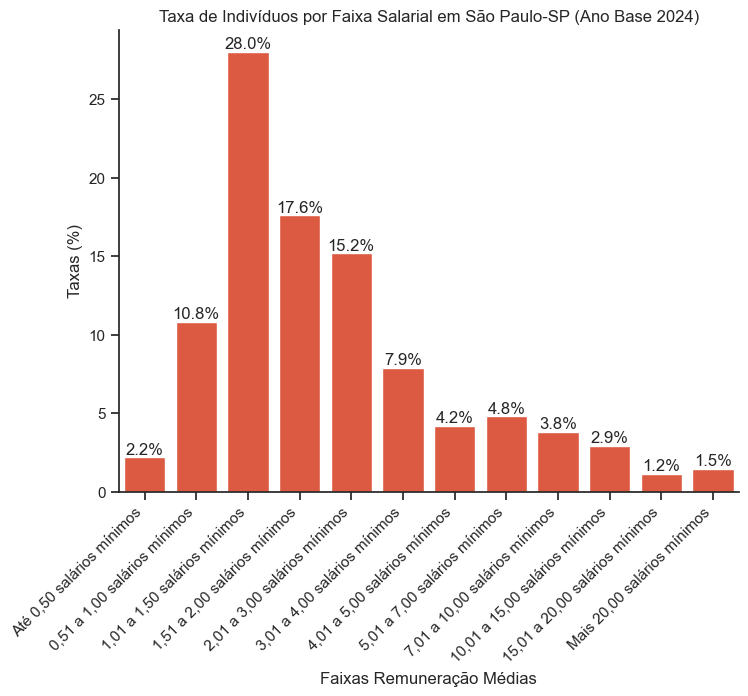

In [13]:
# Distribuição de frequência das faixas de remuneração médias em São Paulo-SP:
plt.figure(figsize=(8, 6))
sns.set_theme(style="ticks")

plot1 = sns.countplot(
    data=translated_df_sp,
    x="faixa_remun_media_sm_traduzido",
    stat="percent",
    color="#F54927"
)

for bar in plot1.patches:
    plot1.text(
        bar.get_x() + bar.get_width() / 2.,  # Posição de x.
        bar.get_height(),                    # Posição de y.
        f"{round(bar.get_height(), 1)}%",    # Texto
        ha="center", va="bottom"
    )

plt.title("Taxa de Indivíduos por Faixa Salarial em São Paulo-SP (Ano Base 2024)")
plt.xlabel("Faixas Remuneração Médias")
plt.ylabel("Taxas (%)")
plt.xticks(rotation=45, horizontalalignment="right")
sns.despine(top=True, right=True)

Este gráfico nos dá a distribuição de frquência de cada faixa média salarial. Observamos uma distribuição assimétrica positiva, onde os maiores salários se concentram em poucos indivíduos. 28% dos indivíduos estão na faixa de 1,01 a 1,5 salários mínimos (moda), e 2,2% estão na faixa salarial de até 0,5 salários mínimos, enquanto que indivíduos que recebem a partir de 4 salários mínimos são menos que 5%.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Até 0,50 salários mínimos'),
  Text(1, 0, '0,51 a 1,00 salários mínimos'),
  Text(2, 0, '1,01 a 1,50 salários mínimos'),
  Text(3, 0, '1,51 a 2,00 salários mínimos'),
  Text(4, 0, '2,01 a 3,00 salários mínimos'),
  Text(5, 0, '3,01 a 4,00 salários mínimos'),
  Text(6, 0, '4,01 a 5,00 salários mínimos'),
  Text(7, 0, '5,01 a 7,00 salários mínimos'),
  Text(8, 0, '7,01 a 10,00 salários mínimos'),
  Text(9, 0, '10,01 a 15,00 salários mínimos'),
  Text(10, 0, '15,01 a 20,00 salários mínimos'),
  Text(11, 0, 'Mais 20,00 salários mínimos')])

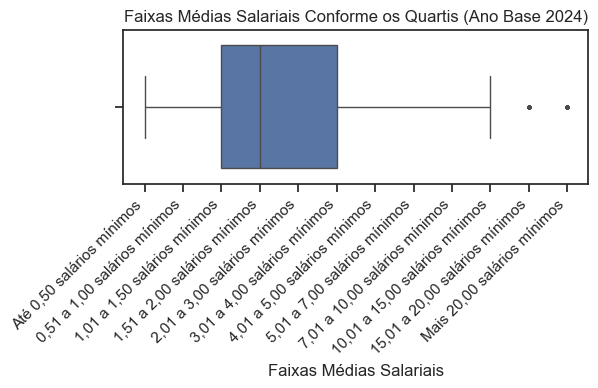

In [14]:
# Distribuição salarial conforme posição relativa dos quartis:
plt.figure(figsize=(6, 2))
sns.set_theme(style="ticks")

sns.boxplot(
    data=translated_df_sp,
    x="faixa_remun_media_sm_traduzido",
    fliersize=1.5,
)
plt.title("Faixas Médias Salariais Conforme os Quartis (Ano Base 2024)")
plt.xlabel("Faixas Médias Salariais")
plt.xticks(rotation=45, horizontalalignment="right")

O gráfico de boxplot, neste contexto, aborda a distribuição dos dados de uma maneira diferente, identificamos aqui a porcentagem de indivíduos que alcançam determinadas faixas salariais em São Paulo. Vemos que a menor faixa salarial é de quen recebe até 0,50 salários mínimos. Outra informação é de que 25% dos indivíduos estão abaixo da faixa salarial de 1,01 a 1,50 salários mínimos, 50% (a mediana) são dos que chegam a faixa de 1,51 a 2,00 salários mínimos. Agora, 75% dos indivíduos da cidade não ultrapassam uma faixa de 3,01 a 4,00 salários mínimos. Já 25% dos indivíduos, recebem mais de 5,01 salários mínimos. Existem indivíduos com mais de 20 salários mínimos. Avaliando a variabilidade com o intervalo interquartil, vemos que existe uma variação de 1,01 a 1,50 a 3,01 a 4,00 salários mínimos. 

Obs: Os outliers visualizados no gráfico são dados válidos e por isso não serão removidos.

### Distribuição das faixas médias salariais no contexto de gênero

In [15]:
# Dataset com apenas as taxas, sexo_trabalhador e faixas médias salariais:
distribution_sex = (
    translated_df_sp[["faixa_remun_media_sm_traduzido", "sexo_trabalhador_traduzido"]]
    .value_counts(normalize=True)
    .mul(100)
    .reset_index(name="taxa")
)

distribution_sex.head()

,faixa_remun_media_sm_traduzido,sexo_trabalhador_traduzido,taxa
0,"1,01 a 1,50 salários mínimos",feminino,14.945265
1,"1,01 a 1,50 salários mínimos",masculino,13.051326
2,"1,51 a 2,00 salários mínimos",masculino,10.294223
3,"2,01 a 3,00 salários mínimos",masculino,9.096104
4,"1,51 a 2,00 salários mínimos",feminino,7.291121


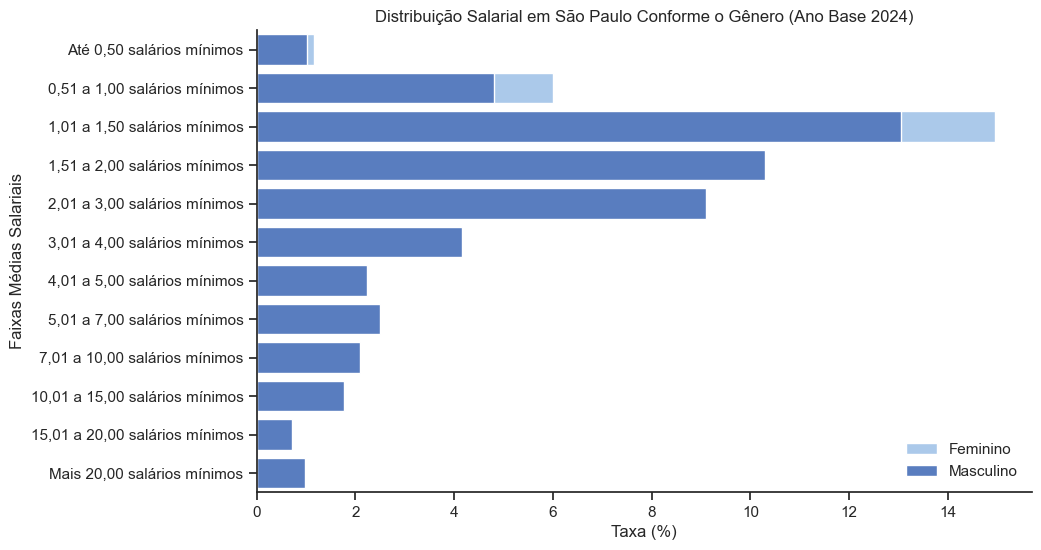

In [16]:
# Distribuição de frequência em porcentagem conforme gênero do trabalhador:
f, ax = plt.subplots(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Gráfico da distribuição do gênero feminio:
sns.set_color_codes("pastel")
p1 = sns.barplot(
    data=distribution_sex[distribution_sex["sexo_trabalhador_traduzido"] == "feminino"],
    x="taxa",
    y="faixa_remun_media_sm_traduzido",
    label="Feminino",
    color="b",
)

# Gráfico da distribuição do gênero masculino:
sns.set_color_codes("muted")
p2 = sns.barplot(
    data=distribution_sex[distribution_sex["sexo_trabalhador_traduzido"] == "masculino"],
    x="taxa",
    y="faixa_remun_media_sm_traduzido",
    label="Masculino",
    color="b"
)

ax.set_title("Distribuição Salarial em São Paulo Conforme o Gênero (Ano Base 2024)")
ax.set_xlabel("Taxa (%)")
ax.set_ylabel("Faixas Médias Salariais")
ax.legend(frameon=False, loc="lower right")
sns.despine(top=True, right=True)

Conforme visualiza-se no gráfico, os homens possuem salários maiores que as mulheres,
o único contexto onde as mulheres superam os homens é com relação aos baixos salários.
Em outras palavras, se olharmos as faixas médias salariais menores, as mulheres aparentemente
são maioria, ainda que com pequena diferença, porém, esse cenário vai mudando quando as faixas médias salariais vão aumentando e os homens passam a ter uma predominância.

Vamos analisar as diferenças salariais com base na cor e raça.

Text(0, 0.5, 'Faixas de Remuneração Médias')

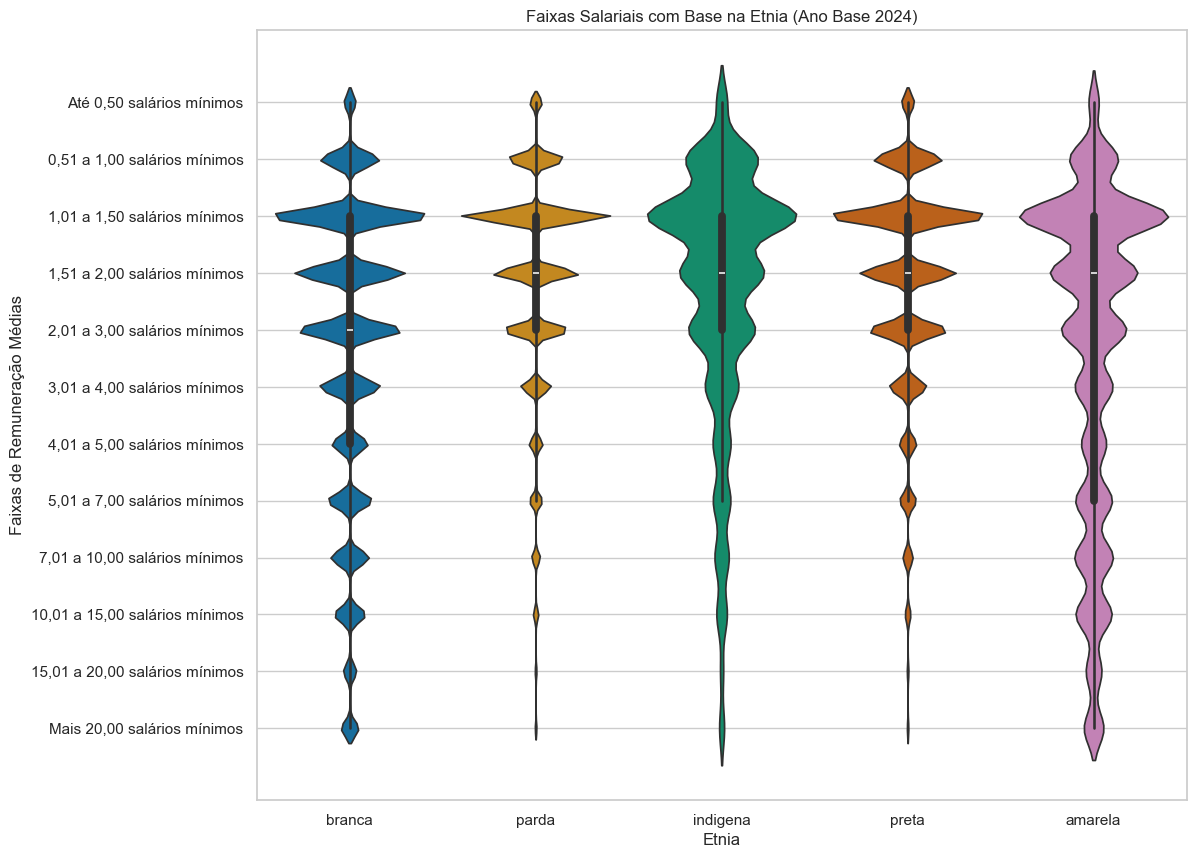

In [17]:
# Distribuição dos salários conforme raça:
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

sns.violinplot(
    data=translated_df_sp,
    x="raca_cor_traduzido",
    y="faixa_remun_media_sm_traduzido",
    hue="raca_cor_traduzido",
    palette="colorblind",
)

plt.title("Faixas Salariais com Base na Etnia (Ano Base 2024)")
plt.xlabel("Etnia")
plt.ylabel("Faixas de Remuneração Médias")

O gráfico de violino nos dá uma visão muito mais clara sobre a densidade das observaçõesem de cada faixa de salarial.

Todos os grupos possuem uma assimetria positiva, onde há uma maior densidade concentrada nas menores faixas salariais. O pico, ou seja, a concentração, se mostra na faixa salarial de 1,01 a 1,50 salários mínimos. Conforme se avança para as maiores faixas salariais, menor o número de representantes. Porém, entre todos os grupos, os indígenas possuem mais representantes, ou seja, uma maior densidade nas faixas salariais menores.

Partindo do ponto de vista da posição relativa das faixas médias salariais, ou seja, observando os quartis, vemos que todos os grupos possuem 25% dos indivíduos com salários na faixa de até 1,01 a 1,50 saláriosa mínimos. Porém é possível identifdicar uma variabilidade diferente entre os grupos: para brancos 50% intermediários dos indivíduos estão entre as faixas médias salariais de 1,01 a 1,50 e 4,01 a 5,00 salários mínimos. No entanto, olhando para os pardos, pretos e indíginas, 50% intermediários dos indivíduos estão entre as faixas médias salariais de 1,01 a 1,50 e 2,01 a 3,00 salários mínimos. Enquanto que para o grupo dos amarelos, a variabilidade é ainda maior, onde 50% intermediários dos indivíduos estão entre as faixas médias salariais de 1,01 e 1,50 a 5,01 e 7,00 salários mínimos.
Os grupos de pardos, pretos e indígenas possuem apenas 25% dos seus representantes com faixas médias salariais com mais de 2,01 a 3,00 salários mínimos, já para brancos e amarelos 25% dos indivíduos destes grupos estão em faixas médias salariais de mais de 4,01 a 5,00 e 5,01 a 7,00 salários mínimos respectivamente.

A mediana para os grupos pardos, pretos, indígenas e amarelos é de 1,51 a 2,00 salários mínimos, ainda que é evidente uma desigualdede na destribuição salarial. Já para os brancos, a mediana é de 2,01 a 3,00.



### Análise das taxas de ocupação por faixa etária e escolaridade

O objetivo é obter as distribuições das taxas de ocupação por faixa etária, escolaridade e gênero.

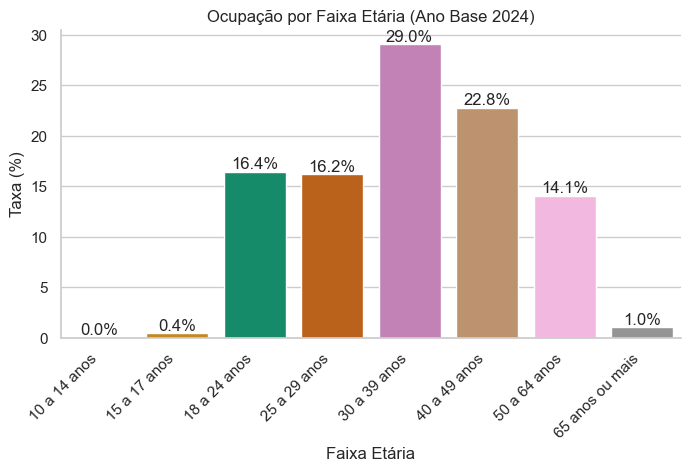

In [19]:
# Distribuição da ocupação por idade:
plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid")

plot = sns.countplot(
    data=translated_df_sp,
    x="faixa_etaria_traduzido",
    stat="percent",
    hue="faixa_etaria_traduzido",
    palette="colorblind",
)

for bar in plot.patches:
    plot.text(
        bar.get_x() + bar.get_width() /2.,
        bar.get_height(),
        f"{round(bar.get_height(), 1)}%",
        ha="center", va="bottom"
    )

plt.title("Ocupação por Faixa Etária (Ano Base 2024)")
plt.xlabel("Faixa Etária")
plt.ylabel("Taxa (%)")
plt.xticks(rotation=45, horizontalalignment="right")
sns.despine(top=True, right=True)

A faixa etária com maior número de representes como é possível ver é a de 30 a 49 anos (a moda), seguida pela faixa de 40 a 49 anos. Observando as faixas de 18 a 24 e 25 a 29, vemos que ambas são muito semelhantes, com 16,4% e 16,2% respectivamente. Ainda temos 1% de indivíduos trabalhando, e 14% de indivíduos com 50 a 64 anos. 

In [ ]:
# Dataset com a taxa de ocupação por gênero:
taxa_ocupacao_genero = translated_df_sp["sexo_trabalhador_traduzido"].value_counts(normalize=True).mul(100).reset_index(name="porcentagem")

Text(0, 0.5, 'Gênero')

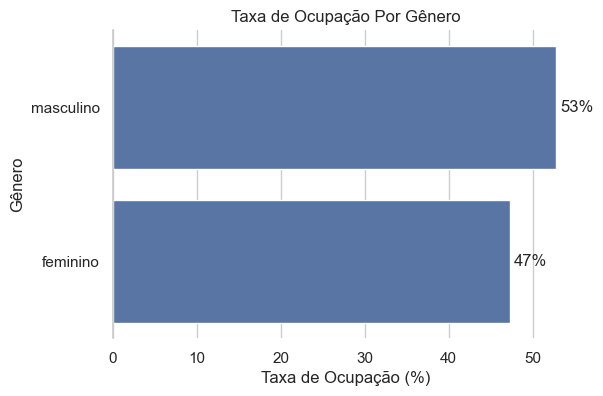

In [ ]:
# Taxa de ocupação por gênero:
plt.figure(figsize=(6, 4))
sns.set_color_codes("pastel")
sns.set_theme(style="whitegrid")


plot = sns.barplot(
    data=taxa_ocupacao_genero,
    x="porcentagem",
    y="sexo_trabalhador_traduzido",
)
for patch in plot.patches:
    plot.text(
        patch.get_width() + 0.5,
        patch.get_y() + patch.get_height() / 2.,
        f"{round(patch.get_width())}%",
        ha="left", va="center",
    )

sns.despine(right=True, bottom=True, top=True)
plt.title("Taxa de Ocupação Por Gênero")
plt.xlabel("Taxa de Ocupação (%)")
plt.ylabel("Gênero")

O gráfico mostra claramente uma taxa de ocupação maior dos homens, pouco mais de 50%, enquanto que para as mulheres, aproximadamente 48% é a taxa de ocupação.

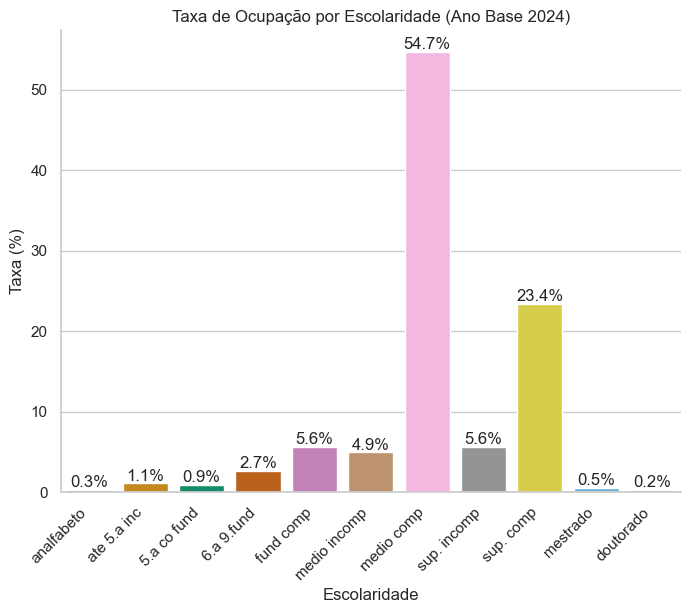

In [22]:
# Taxa de ocupação por escolaridade:
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

plot3 = sns.countplot(
    data=translated_df_sp,
    x="escolaridade_apos_2005_traduzido",
    stat="percent",
    hue="escolaridade_apos_2005_traduzido",
    palette="colorblind",
)

for bar in plot3.patches:
    plot3.text(
        bar.get_x() + bar.get_width() / 2.,
        bar.get_height(),
        f"{round(bar.get_height(), 1)}%",
        ha="center", va="bottom",
    )

plt.title("Taxa de Ocupação por Escolaridade (Ano Base 2024)")
plt.xlabel("Escolaridade")
plt.ylabel("Taxa (%)")
plt.xticks(rotation=45, horizontalalignment="right")
sns.despine(top=True, right=True)

Como vemos, indivíduos com ensino médio completo tem uma taxa de ocupação de 54,7%, fundamental completo com taxa de ocupação de 5,6% e superior completo com 23,4%. Mestrado e doutorado, somados, não chegam a 1%.

### Conclusão e insights

Avaliado a distribuição de acordo com cada faixa salarial na cidade de São Paulo, observamos uma distribuição assimétrica positiva, onde os maiores salários se concentram em poucos indivíduos. 28% dos indivíduos estão na faixa de 1,01 a 1,5 salários mínimos (moda), e 2,2% estão na faixa salarial de até 0,5 salários mínimos, enquanto que indivíduos que recebem a partir de 4 salários mínimos são menos que 5%.

Agora, avaliando a distribuição salarial, observamos que 25% dos trabalhadores estão abaixo de 1, 01 a 1,50 salários mínimos, enquanto que 25% ganham mais de 4 salários mínimos. A mediana é de 1,51 a 2,00 salários mínimos, o que representa 50% dos nossos salários. A variação dos salários na cidade fica entre 1 a 4 salários mínimos. 

Considerando a distribuição salarial em um contexto de gênero, percebemos que as mulheres são maioria quando os salários são mais baixos, já os homens predominam os salários mais altos. A taxa de ocupação dos homens também é maior em relação as mulheres, mais de 50% e aproximadamente 48% respectivamente. 

Já com relação a etnia, vemos que os grupos pardos, pretos, indígenas e amarelos possuem 50% dos indivíduos com uma faixa média salarial de 1,51 a 2,00 salários mínimos, equanto brancos possuem 50% dos seus representantes com uma faixa média salarial de 2,01 a 3,00 salários mínimos. No entanto, avaliando a variabilidade das faixas médias salariais entre os grupos, brancos e amarelos são os que possuem m amior variação. Para brancos, os salários variam entre 1,01 a 1,50 e 4,01 a 5,00 salários mínimos, já os amarelos tem uma variação de 1,01 a 1,50 e 5,01 a 7,00 salários mínimos. Os grupos pardos, pretos e indígenas possuem uma menor variação de salário se comparmos aos dois primeiros grupos citados. A variação vai de 1,01 a 1,50 e 2,01 a 3,00 salários mínimos, e entre esses três grupos, os indígenos apresentam uma maior reresentação nas menores faixas médias salariais, evidencializando uma desigualdade ainda maior neste grupo.

As taxas de ocupação considerando faixa etária e escolaridade se mostram da seguinte forma:
- Faixa etária de 18 a 24 e 25 a 29 ambas estão muito próximas quanto a taxa de ocupação, de 16,4% e 16,2% respectivamente.
- Para faixa etária de 30 a 39 e 40 a 49 anos, temos uma taxa de 29% e 22,8% respectivamente.
- Para 50+, temos uma taxa de aproximadamente 15%.
- 54,7% da taxa de ocupação são de pessoas com ensino médio completo.
- menos de 1% é a taxa de ocupação de profissionais com mestrado e doutorado.
- Profissionais com superior completo, compreendem uma taxa de ocupação de 23,4%.

